# Reddit Narcissism Behavior EDA

## Load the data

In [6]:
import pandas as pd

file_path = 'cleaned_file (1).csv'
df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   subreddit      5374 non-null   object
 1   title          5369 non-null   object
 2   score          5374 non-null   int64 
 3   id             5374 non-null   object
 4   url            5374 non-null   object
 5   comments       5374 non-null   int64 
 6   creation time  5374 non-null   object
 7   content        4010 non-null   object
dtypes: int64(2), object(6)
memory usage: 336.0+ KB


,subreddit,title,score,id,url,comments,creation time,content
0,narcissisticinlaws,in laws encourage bullying,1,16bjmj1,httpswwwredditcomrnarcissisticinlawscomments16...,0,20230906 125739,my inlaws have changed there parenting per chi...
1,narcissisticspouses,hidden tracker apps,2,1ddnqjb,httpswwwredditcomrnarcissisticspousescomments1...,1,20240611 200730,i think he is tracking me and im not sure if i...
2,narcissisticparents,narc mother terminal illness less than a month,3,1dg697r,httpswwwredditcomrnarcissisticparentscomments1...,1,20240615 010505,okay in short my narc mother had a brain tumor...
3,narcissisticmothers,is it fair for my mom to do this,7,1cxqpin,httpswwwredditcomrnarcissisticmotherscomments1...,4,20240522 032752,my mom doesnt like the way i dress and is now ...
4,narcissisticmothers,parents withdrawing financial support,4,1bqa2r6,httpswwwredditcomrnarcissisticmotherscomments1...,3,20240328 232635,turned 18 in january have been bombarded with...


## 2. How many rows and columns does the dataset have?

In [7]:
num_rows, num_columns = df.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 5374 rows and 8 columns.


## 3. Are there any missing values in the dataset? If so, which columns contain them, and how many?

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

subreddit           0
title               5
score               0
id                  0
url                 0
comments            0
creation time       0
content          1364
dtype: int64


## 4. What are the summary statistics for each numerical column (mean, median, standard deviation, min, max, quartiles)?

In [9]:
summary_stats = df.describe()
print(summary_stats)

             score     comments
count  5374.000000  5374.000000
mean      7.408820     6.893376
std      13.071585    14.249641
min       0.000000     0.000000
25%       2.000000     0.000000
50%       3.000000     2.000000
75%       8.000000     7.000000
max     297.000000   317.000000


## Distribution of values in each numerical column

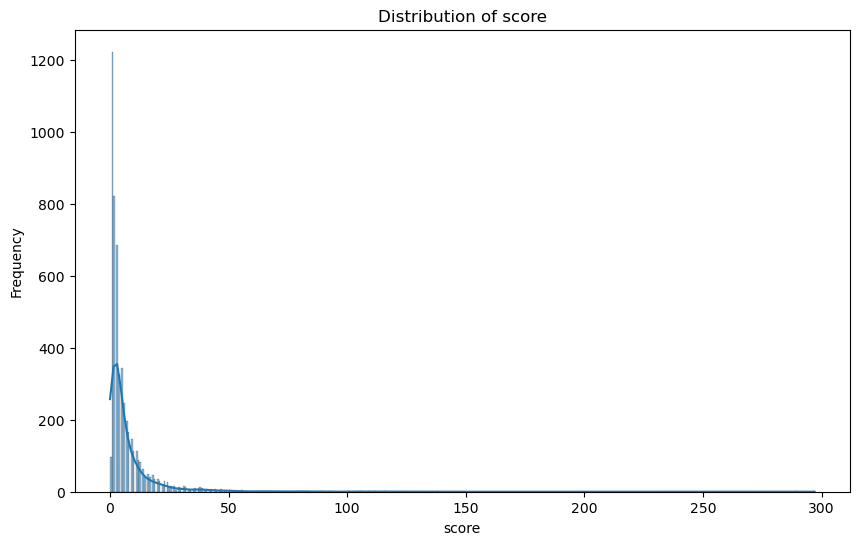

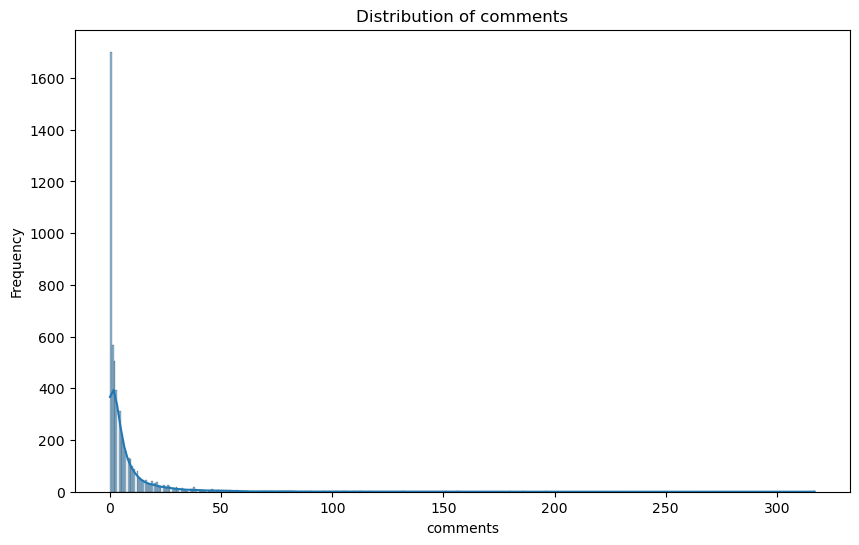

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Outliers in the numerical data

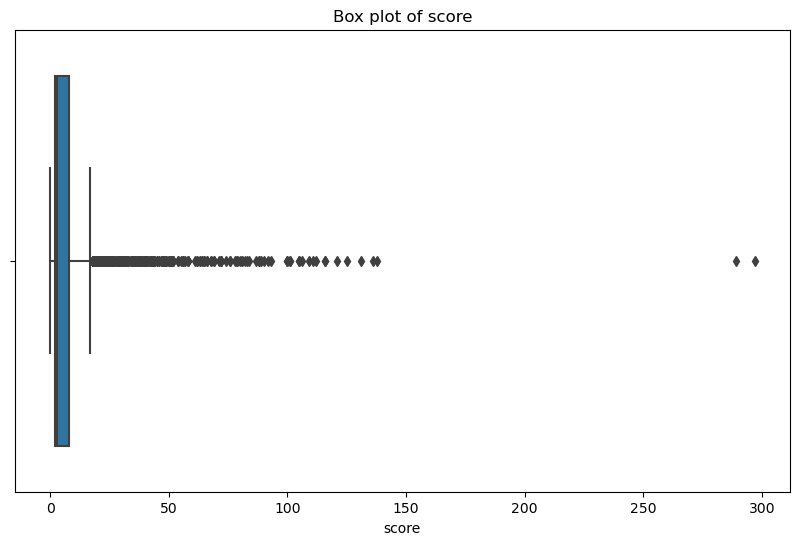

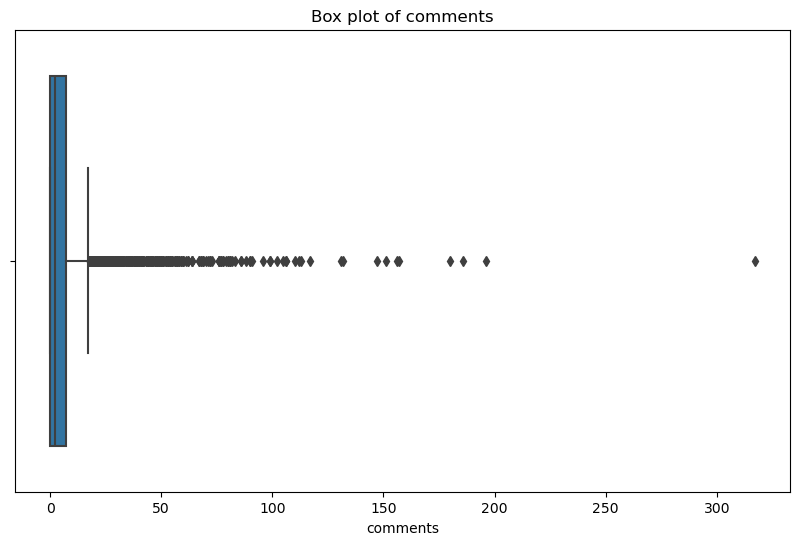

In [11]:

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()


## unique values and their counts in each categorical column

In [12]:

categorical_columns = df.select_dtypes(include=['object']).columns

unique_values_counts = {col: df[col].value_counts() for col in categorical_columns}
for col, counts in unique_values_counts.items():
    print(f'Unique values in {col}:\n{counts}\n')


Unique values in subreddit:
subreddit
narcissisticspouses      1001
narcissisticmothers       994
narcissisticparents       993
narcissistic              362
narcissistrecovery        310
narcissistmomsurvivor     270
narcissisticcoparents     243
narcissism                243
narcissisticsiblings      172
narcissisticrebound       155
narcissisticfamily        111
narcissistabuse           110
narcissisticpeople         92
narcissismsurvival         71
narcissisticinlaws         63
narcissistparents          46
narcissistapocalypse       42
narcissisticmil            28
narcissisticexposed        24
narcissismrecoverynow      15
narcissisticabuse2          9
narcissismquotes            8
narcissisticouija           3
narcissismrehab             3
narcissistmils              2
narcissistwithajob          2
narcissisticgoddess         1
narcissistickids            1
Name: count, dtype: int64

Unique values in title:
title
biweekly ask a narcissist thread for visitorscodependents  not a 

## Categorical variables distribution

In [ ]:


for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


## Duplicate rows in the dataset

In [17]:

duplicate_rows = df.duplicated().sum()
print(f'There are {duplicate_rows} duplicate rows in the dataset.')


There are 0 duplicate rows in the dataset.


## Inconsistencies or errors in the data

In [19]:

for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Unique values in {col}: {df[col].unique()}\n')
    elif df[col].dtype in ['int64', 'float64']:
        print(f'Summary statistics for {col}:\n{df[col].describe()}\n')


Unique values in subreddit: ['narcissisticinlaws' 'narcissisticspouses' 'narcissisticparents'
 'narcissisticmothers' 'narcissistparents' 'narcissisticfamily'
 'narcissisticrebound' 'narcissisticpeople' 'narcissistic'
 'narcissistmomsurvivor' 'narcissisticsiblings' 'narcissisticcoparents'
 'narcissism' 'narcissistapocalypse' 'narcissistrecovery'
 'narcissistabuse' 'narcissisticmil' 'narcissismsurvival'
 'narcissisticexposed' 'narcissisticgoddess' 'narcissismrecoverynow'
 'narcissistmils' 'narcissismquotes' 'narcissisticouija'
 'narcissisticabuse2' 'narcissismrehab' 'narcissistickids'
 'narcissistwithajob']

Unique values in title: ['in laws encourage bullying' 'hidden tracker apps'
 'narc mother terminal illness less than a month' ...
 'is it normal for a narcissist to just leave'
 'pay no attention to those devoid of soul no reaction'
 'my ns lied to steal attention from my other sister who miscarriaed']

Summary statistics for score:
count    5374.000000
mean        7.408820
std      

## Imputation & Removal

In [20]:
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)


subreddit        0
title            0
score            0
id               0
url              0
comments         0
creation time    0
content          0
dtype: int64


## Varying Data Across Segments

In [25]:
# Main trends and patterns
if 'date' in df.columns:
    df.set_index('date', inplace=True)
    time_series_data = df.resample('M').mean()
    plt.figure(figsize=(12, 6))
    plt.plot(time_series_data)
    plt.title('Monthly Trends')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend(time_series_data.columns)
    plt.show()
